In [ ]:
! python -m pip install --upgrade pip

In [ ]:
! python -m pip install tensorflow

In [ ]:
! python -m pip install numpy scipy pandas matplotlib seaborn pillow

In [1]:
import tensorflow

tensorflow.__version__

'2.19.0'

In [2]:
import pandas

adult = pandas.read_csv("adult.csv")

adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
y = adult["income"].map({">50K": 1, "<=50K": 0})

y.value_counts(normalize=True)

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64

In [4]:
adult["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [5]:
adult["marital.status"].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [6]:
x1 = adult["age"]
x2 = adult["workclass"].map({
    "Private": -1,
    "Self-emp-inc": -0.75,
    "Self-emp-not-inc": -0.5,
    "?": 0,
    "Never-worked": 0,
    "Without-pay": 0,
    "Local-gov": 0.5,
    "State-gov": 0.75, 
    "Federal-gov": 1
})
x3 = adult["education.num"]
x4 = adult["marital.status"].map({
    "Married-civ-spouse": 1,
    "Never-married": 0,
    "Divorced": -1,
    "Separated": -0.75,
    "Widowed": -0.5,
    "Married-spouse-absent": -0.25,
    "Married-AF-spouse": 0.25,
})

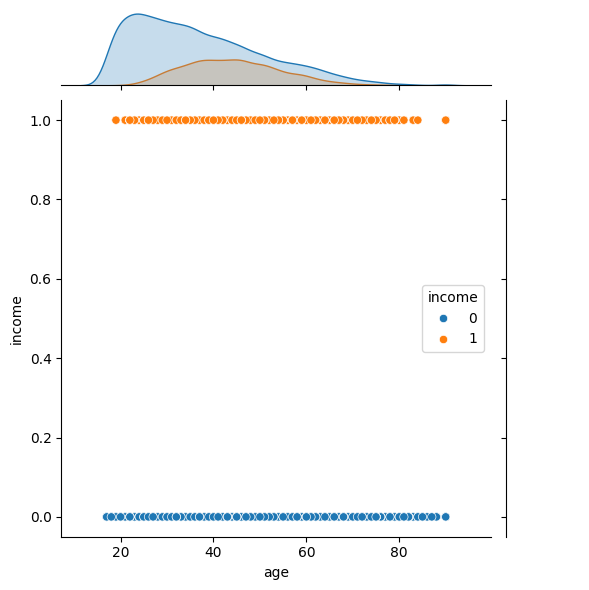

In [7]:
import seaborn

seaborn.jointplot(x=x1, y=y, hue=y)

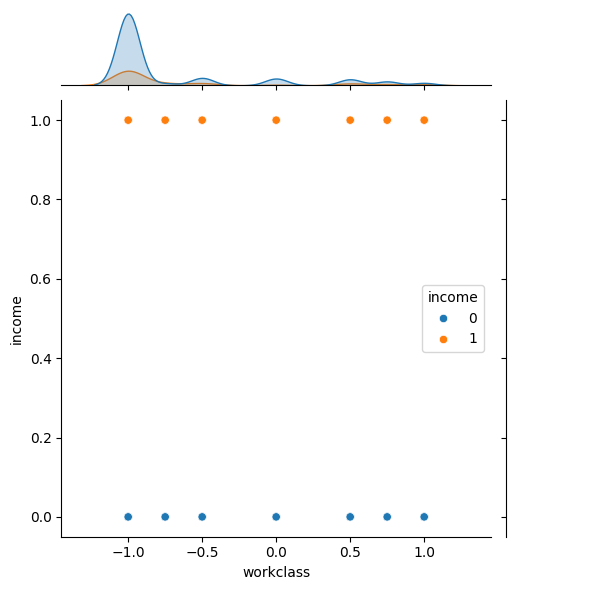

In [8]:
seaborn.jointplot(x=x2, y=y, hue=y)

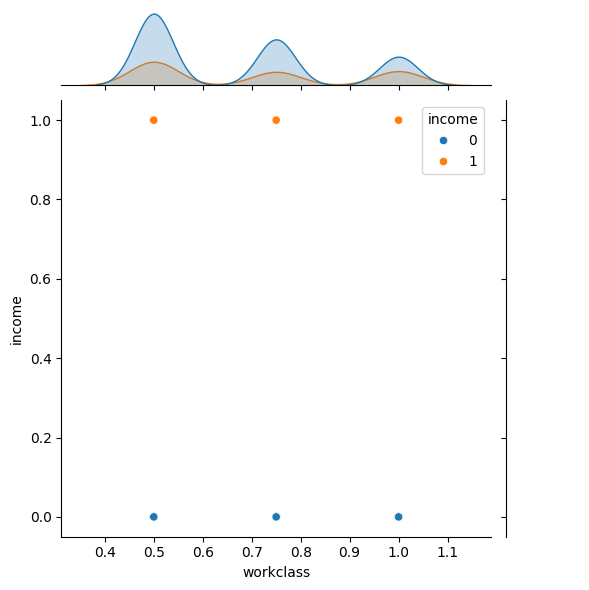

In [9]:
seaborn.jointplot(x=x2[x2 > 0], y=y[x2 > 0], hue=y)

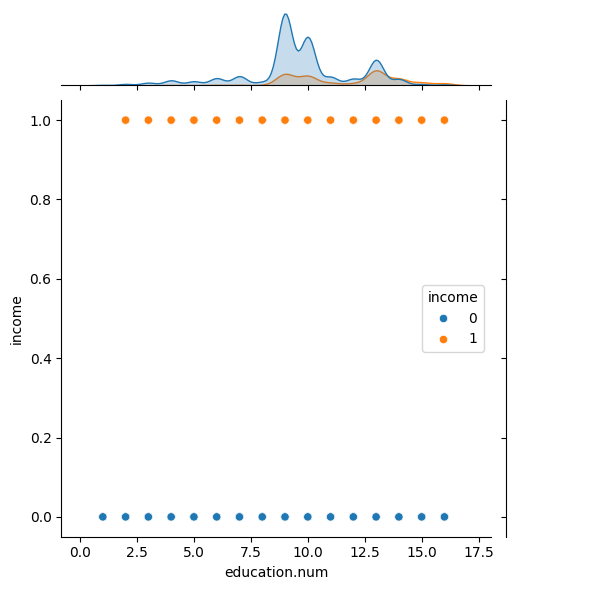

In [10]:
seaborn.jointplot(x=x3, y=y, hue=y)

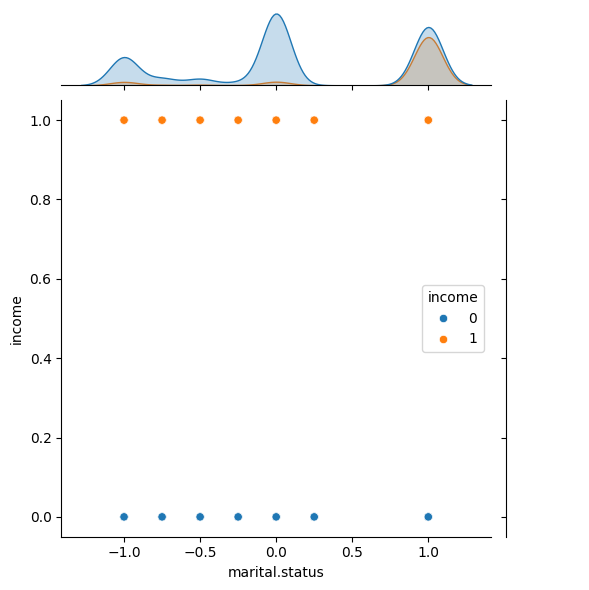

In [11]:
seaborn.jointplot(x=x4, y=y, hue=y)

In [12]:
X = pandas.DataFrame([
    x1, x2, x3, x4
]).T

X

,age,workclass,education.num,marital.status
0,90.0,0.0,9.0,-0.50
1,82.0,-1.0,9.0,-0.50
2,66.0,0.0,10.0,-0.50
3,54.0,-1.0,4.0,-1.00
4,41.0,-1.0,10.0,-0.75
...,...,...,...,...
32556,22.0,-1.0,10.0,0.00
32557,27.0,-1.0,12.0,1.00
32558,40.0,-1.0,9.0,1.00
32559,58.0,-1.0,9.0,-0.50


In [22]:
import tensorflow

model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Input(shape=(4,)), # Inputs
    tensorflow.keras.layers.Dense(64, activation="relu"),
    tensorflow.keras.layers.Dense(64, activation="relu"),
    # tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(1, activation="sigmoid") # Outputs
])

model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(),
    loss=tensorflow.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", 
             tensorflow.keras.metrics.Precision(name="precision"), 
             tensorflow.keras.metrics.Recall(name="recall")
    ]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import numpy
model.fit(
    numpy.array(X),
    numpy.array(y), 
    batch_size=3200, 
    epochs=1000
)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3251 - loss: 2.2276 - precision: 0.2408 - recall: 0.8377  
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7617 - loss: 0.8755 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.6243 - precision: 0.1766 - recall: 0.0155         
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7605 - loss: 0.5832 - precision: 0.5735 - recall: 0.0133 
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7623 - loss: 0.5461 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.5296 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.5163 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.5051 - pre